In [1]:
from transformers import logging
from transformers import BertModel, BertTokenizer
from transformers import pipeline
import torch
import torch.nn as nn
from torch.nn.functional import normalize, log_softmax

In [2]:
logging.set_verbosity_error()
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
from LamaTRExData import LamaTRExData
from DistributionComparison.DistributionComparisonResult import DistributionComparisonResult 
from DistributionComparison.SentenceTypologyEmbeddingDistributionComparison import SentenceTypologyEmbeddingDistributionComparison 
from ModelHelpers.fill_mask_helpers import get_distribution_from_pipeline
from relation_templates.templates import get_templates, get_relation_meta, relations
from Metrics.probability_distributions import jensen_shannon_divergence

In [4]:
USELESS_WORD = "Erftwerk"
UNKNOWN_TOKEN = "[UNK]"
MASK = "[MASK]"
OBJ_LABEL = "obj-label"
SUBJ_LABEL = "sub-label"
VOCABULARY_SIZE = 28996
words = [ USELESS_WORD, UNKNOWN_TOKEN] 

In [5]:
#relations = ["P19", "P36", "P101", "P178"]
#relations = ["P140"]
relations = ["P19", "P413", "P159", "P103"]

In [6]:
model = pipeline('fill-mask', model="bert-base-cased", top_k=VOCABULARY_SIZE)

In [7]:
TREx = LamaTRExData(relations = relations)
TREx.load()

In [8]:
@torch.no_grad()
def metric(left_sentence: str, right_sentence: str):
    Q_dist = get_distribution_from_pipeline(model(left_sentence))
    P_dist = get_distribution_from_pipeline(model(right_sentence))
    return jensen_shannon_divergence(Q_dist,P_dist)

In [9]:
Comparer = SentenceTypologyEmbeddingDistributionComparison(relations, get_templates, words, metric, MASK, get_relation_meta, "JS-Divergence",)

In [10]:
nr_of_compared_triplets = 15

In [11]:
Comparer.compare(TREx.data, nr_of_compared_triplets)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [11:31<00:00, 46.07s/it]


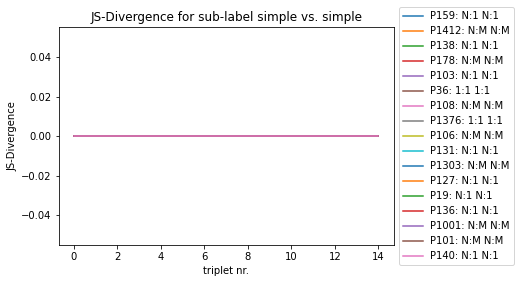

In [12]:
Comparer.print_comparison("simple", "simple", SUBJ_LABEL)

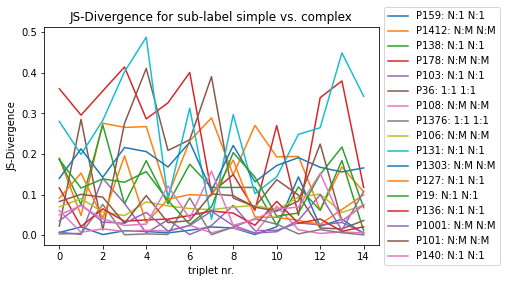

In [13]:
Comparer.print_comparison("simple", "complex", SUBJ_LABEL)

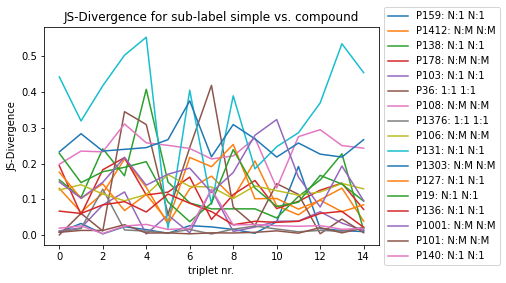

In [14]:
Comparer.print_comparison("simple", "compound", SUBJ_LABEL)

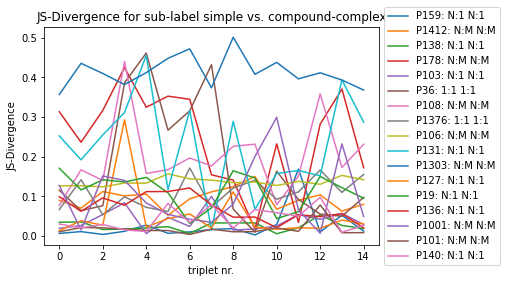

In [15]:
Comparer.print_comparison("simple", "compound-complex", SUBJ_LABEL)